In [1]:
# Import numpy
import numpy as np

# Importing plotting stuff
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

# Use seaborn plotting style defaults
#import seaborn as sns; sns.set()

# Import Astropy things we need
from astropy.io import ascii

import astropy.coordinates as coord
import astropy.units as u
from astropy.table import Table

#Import Pandas
import pandas as pd

# Importing Principal Component Analysis
from sklearn.decomposition import PCA

In [2]:
# Query OGLE-III database for Type II Cepheids: http://ogledb.astrouw.edu.pl/~ogle/CVS/
data = ascii.read('AllTypeIICepheidsinOGLE.txt') # All of the Type II Cepheids in the OGLE Survey
data

ID,Field,StarID,RA,Decl,Type,I,V,P_1,dP_1,T0_1,A_1,R21_1,phi21_1,R31_1,phi31_1
str18,str8,int64,str12,str11,str5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
OGLE-LMC-T2CEP-001,LMC154.1,4967,4:38:15.33,-68:15:32.0,BLHer,17.734,18.452,1.8139522,6.3e-06,2162.79006,0.348,0.067,4.852,0.194,2.252
OGLE-LMC-T2CEP-002,LMC148.3,131,4:42:33.95,-68:37:03.7,WVir,15.711,16.632,18.3235458,0.0007387,2158.39503,0.9,0.126,6.139,0.039,4.172
OGLE-LMC-T2CEP-003,LMC145.6,3272,4:43:05.54,-66:49:36.1,RVTau,14.166,14.953,35.6599298,0.0083419,2142.86567,0.422,0.162,5.869,0.067,5.32
OGLE-LMC-T2CEP-004,LMC147.2,8596,4:44:43.64,-68:05:21.3,BLHer,17.612,18.124,1.9160177,2.3e-06,2170.18129,0.816,0.482,4.664,0.285,2.273
OGLE-LMC-T2CEP-005,LMC143.2,10081,4:48:08.33,-69:51:14.2,RVTau,14.739,15.796,33.1853268,0.0029184,2170.3397,0.861,0.076,6.277,0.012,2.917
OGLE-LMC-T2CEP-006,LMC139.3,412,4:49:48.87,-67:25:20.6,BLHer,18.037,18.513,1.0879243,2.4e-06,2171.55516,0.479,0.24,4.608,0.108,2.902
OGLE-LMC-T2CEP-007,LMC135.7,21276,4:50:50.43,-69:19:23.7,BLHer,18.005,18.597,1.2426421,3.3e-06,2166.63717,0.493,0.265,4.379,0.06,4.11
OGLE-LMC-T2CEP-008,LMC136.7,13893,4:51:11.51,-69:57:27.0,BLHer,17.842,18.585,1.7460989,6.7e-06,2165.20369,0.536,0.207,5.438,0.138,2.724
OGLE-LMC-T2CEP-009,LMC131.8,558,4:52:40.07,-67:09:24.3,BLHer,17.762,18.379,1.7613471,2.7e-06,2166.42198,0.73,0.444,4.582,0.245,1.898


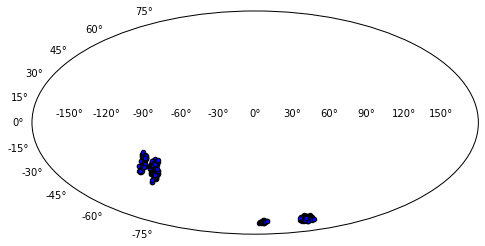

In [3]:
# Getting all Type II Cepheids coordinates in OGLE
ra = coord.Angle(data['RA'], unit=u.hour)
ra.degree
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(data['Decl'], unit=u.degree)
dec.degree

# Plotting all Cepheids
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian)

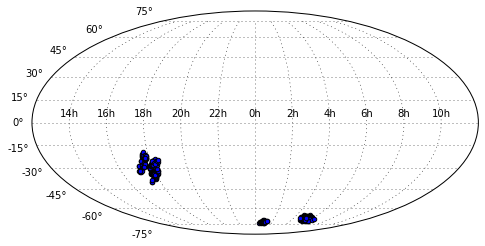

In [4]:
# Dec, RA in hours.
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)

In [5]:
# Save map of Type IIs in LMC, SMC, Bulge in pdf.
fig.savefig("TypeIICepheidsMap.pdf")

In [6]:
# Put Period and I-band mean in arrays.
#P = data['P_1']
#I_mean = data['I']
#V_mean = data['V']
#labels = data['Type']

plt.clf()

def find_unique_elements(arr):
    elements_list = []
    elements_list.append(arr[0])
    for i in range(1,len(arr)):
        if arr[i] not in elements_list:
            elements_list.append(arr[i])
    return elements_list

#number_list = [1, 5, 0, 3, 3]
label_list = find_unique_elements(data['Type'])
label_list

['BLHer', 'WVir', 'RVTau', 'pWVir']

<function matplotlib.pyplot.show>

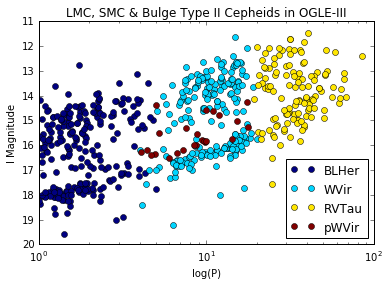

In [7]:
colors = plt.cm.jet(np.linspace(0,1,len(label_list)))


# Plot Period and I_mean.
for j in range(len(label_list)):
    #index = np.where(np.asarray(label_list) == labels)[0]
    plt.semilogx(data['P_1'][data['Type'] == label_list[j]], data['I'][data['Type'] == label_list[j]], label=label_list[j],\
                 linestyle='None', marker='o', color=colors[j])
    plt.title("LMC, SMC & Bulge Type II Cepheids in OGLE-III")
    plt.ylabel("I Magnitude")
    plt.xlabel("log(P)")
    plt.legend(loc='best')

plt.gca().invert_yaxis()
plt.show

In [8]:
# Putting Period and I_mag in same array.
P_I = np.array([data['P_1'], data['I']]).T

In [10]:
# Using 2 PCA Componenets to fit P_I_array.
pca = PCA(n_components=2)
pca.fit(P_I)
print(pca.explained_variance_)
print(pca.components_)

[ 191.27598047    2.05518509]
[[ 0.99826687 -0.05884942]
 [ 0.05884942  0.99826687]]


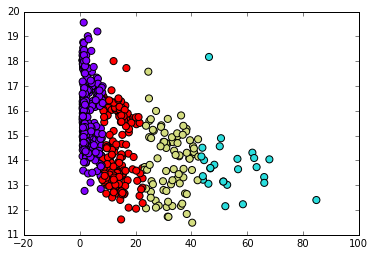

In [15]:
from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(P_I)
y_kmeans = est.predict(P_I)
plt.scatter(P_I[:, 0], P_I[:, 1], c=y_kmeans, s=50, cmap='rainbow')
x

In [32]:
labels = "pWVir"
len(data['P_1'][data['Type'] == labels])

24

In [43]:
print np.where(np.asarray(label_list) == 'BLHer')
ex = np.array([0, 1, 2])

print np.where(ex == 1)

(array([0]),)
(array([1]),)


In [38]:
print label_list

['BLHer', 'WVir', 'RVTau', 'pWVir']
